In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNEL = 3  # (RGB )
EPOCHS = 50  # TRAIL ERROR (TO INCREASE ACCURACY)

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


(32, 256, 256, 3)
[1 0 0 1 0 1 0 0 1 2 2 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0]


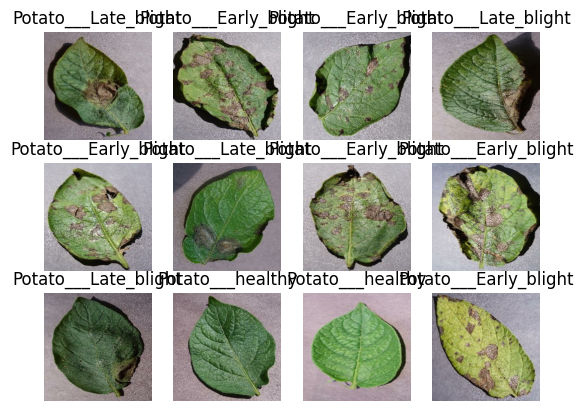

In [6]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [7]:
# Data Split:
Training: 80
Validation: 10
Test: 10

In [8]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [9]:
train_ds = dataset.take(54)
len(train_ds)

54

In [10]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [11]:
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [12]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [13]:
def get_dataset_partitions_tf(
    ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000
):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
len(train_ds)

54

In [16]:
len(val_ds)

6

In [17]:
len(test_ds)

8

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy() / 255)

[[[0.7176471  0.67058825 0.6862745 ]
  [0.6156863  0.5686275  0.58431375]
  [0.68235296 0.63529414 0.6509804 ]
  ...
  [0.8509804  0.81960785 0.8117647 ]
  [0.8509804  0.81960785 0.8117647 ]
  [0.8509804  0.81960785 0.8117647 ]]

 [[0.6627451  0.6156863  0.6313726 ]
  [0.65882355 0.6117647  0.627451  ]
  [0.7921569  0.74509805 0.7607843 ]
  ...
  [0.8509804  0.81960785 0.8117647 ]
  [0.8509804  0.81960785 0.8117647 ]
  [0.8509804  0.81960785 0.8117647 ]]

 [[0.56078434 0.5137255  0.5294118 ]
  [0.7058824  0.65882355 0.6745098 ]
  [0.8        0.7529412  0.76862746]
  ...
  [0.8509804  0.81960785 0.8117647 ]
  [0.8509804  0.81960785 0.8117647 ]
  [0.8509804  0.81960785 0.8117647 ]]

 ...

 [[0.5176471  0.47843137 0.50980395]
  [0.5568628  0.5176471  0.54901963]
  [0.63529414 0.59607846 0.627451  ]
  ...
  [0.6901961  0.67058825 0.69803923]
  [0.69411767 0.6745098  0.7019608 ]
  [0.69411767 0.6745098  0.7019608 ]]

 [[0.654902   0.6156863  0.64705884]
  [0.5647059  0.5254902  0.5568628 ]


In [20]:
from tensorflow.keras.layers import Resizing, Rescaling

resize_and_rescale = tf.keras.Sequential(
    [Resizing(IMAGE_SIZE, IMAGE_SIZE), Rescaling(1.0 / 255)]
)

In [21]:
from tensorflow.keras.layers import RandomFlip, RandomRotation
import tensorflow as tf

data_augmentation = tf.keras.Sequential(
    [
        RandomFlip("horizontal_and_vertical"),
        RandomRotation(0.2),
    ]
)

In [22]:
image_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL)
classes = 3
model = models.Sequential(
    [
        resize_and_rescale,
        data_augmentation,
        layers.Conv2D(
            32, kernel_size=(3, 3), activation="relu", input_shape=image_shape
        ),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(classes, activation="softmax"),
    ]
)
model.build(input_shape=image_shape)
model.summary()

c:\Users\jatin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 2304)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [24]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 65s 982ms/step - accuracy: 0.5694 - loss: 0.8685 - val_accuracy: 0.7604 - val_loss: 0.7013
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 872ms/step - accuracy: 0.7992 - loss: 0.5191 - val_accuracy: 0.7969 - val_loss: 0.5068
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 46s 843ms/step - accuracy: 0.8733 - loss: 0.3066 - val_accuracy: 0.9062 - val_loss: 0.2819
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 866ms/step - accuracy: 0.8935 - loss: 0.2471 - val_accuracy: 0.9167 - val_loss: 0.2080
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 827ms/step - accuracy: 0.9311 - loss: 0.1727 - val_accuracy: 0.8958 - val_loss: 0.2822
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 873ms/step - accuracy: 0.9294 - loss: 0.1833 - val_accuracy: 0.9375 - val_loss: 0.1780
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 837ms/step - accuracy: 0.9317 - loss: 0.2013 - val_accuracy: 0.9323 - val_loss: 0.1604
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 866ms/step - accuracy: 0.9554 - loss: 0.1285 - val_accu

In [25]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

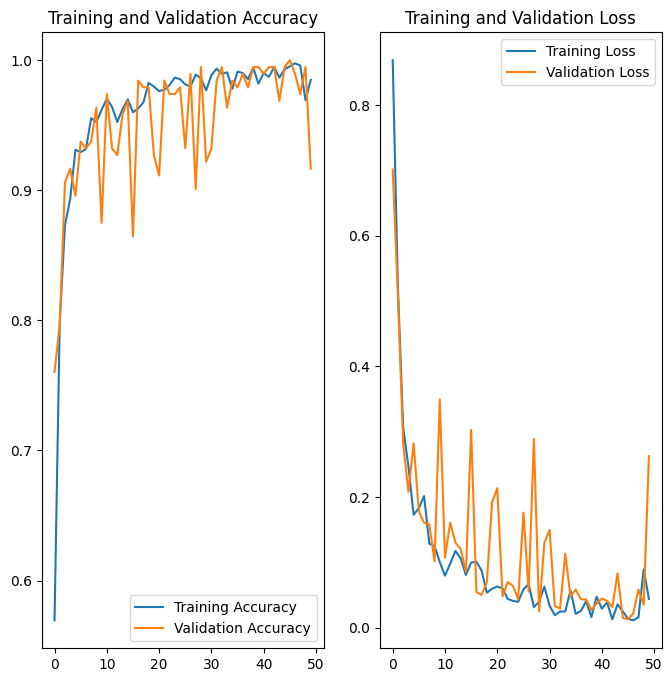

In [26]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

First image to be tested:
Actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
Predicted Label: Potato___Late_blight


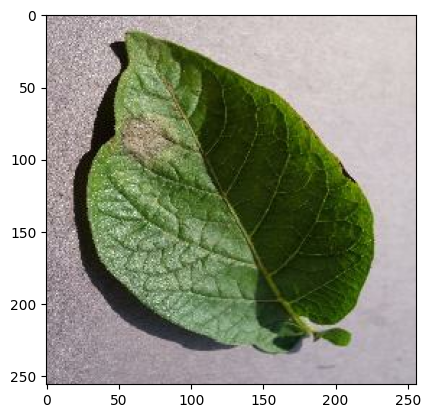

In [27]:
import numpy as np

for test_images, test_labels in test_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    print("First image to be tested:")
    plt.imshow(first_image)
    print("Actual label:", class_names[labels_batch[0].numpy()])
    predictions = model.predict(test_images)
    print("Predicted Label:", class_names[np.argmax(predictions[0])])

In [28]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)

    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


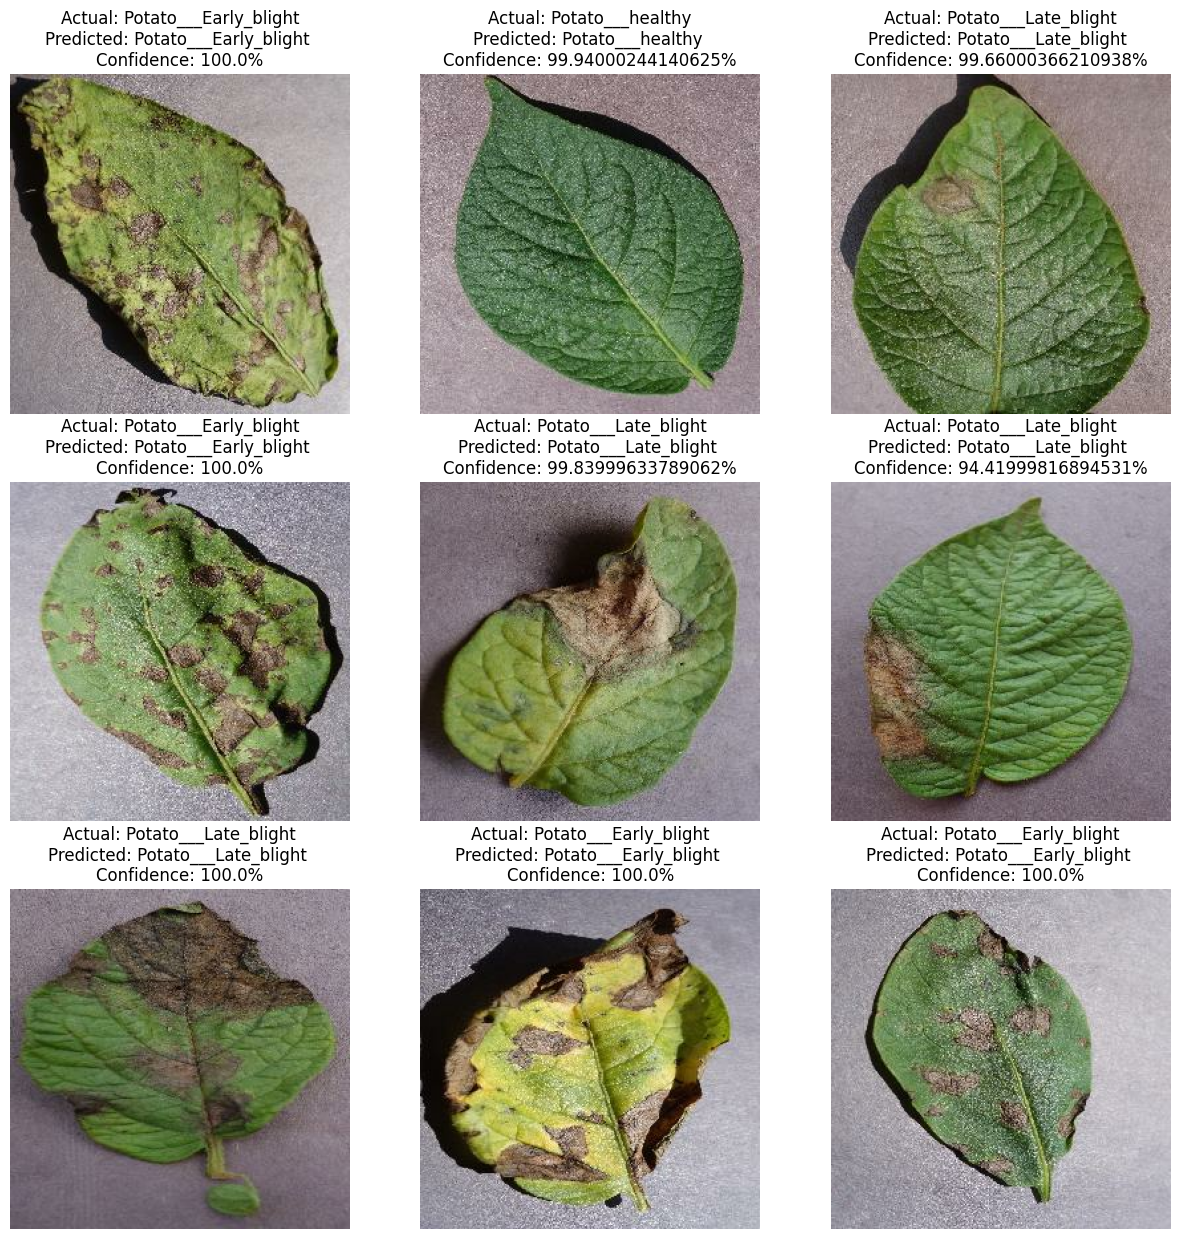

In [29]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i])

        actual_class = class_names[labels[i]]
        plt.axis("off")
        plt.title(
            f"Actual: {actual_class}\nPredicted: {predicted_class} \nConfidence: {confidence}%"
        )

In [30]:
# ===== 8) Save model safely (versioned) =====
import os

os.makedirs("models", exist_ok=True)
# Find next integer version and save with .keras extension (required by Keras 3)
existing = [
    int(d.split(".")[0])
    for d in os.listdir("models")
    if d.split(".")[0].isdigit() and d.endswith(".keras")
]
model_version = (max(existing) + 1) if existing else 1
save_path = f"models/{model_version}.keras"
model.save(save_path)  # <- has .keras extension
print(f"Model saved to: {save_path}")

Model saved to: models/5.keras


In [ ]:
model.save("models/potato_model.keras", save_format="keras")